In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import norm as norm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
houses_train = pd.read_csv('./datasets/train.csv')
houses_test = pd.read_csv('./datasets/test.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
houses_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [4]:
houses_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


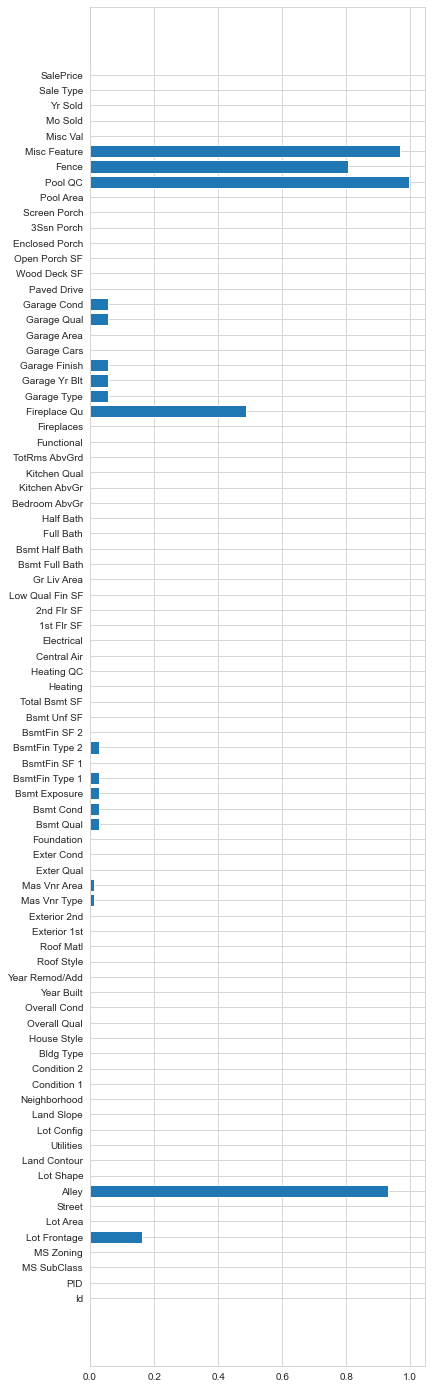

In [5]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 25))
plt.barh(houses_train.columns, houses_train.isna().mean());

In [6]:
houses_train[houses_train['Alley'].isna() == False]['Alley'] # Paved or Gravel, NaN means no alley access

13      Pave
16      Grvl
27      Grvl
43      Grvl
46      Grvl
        ... 
1996    Grvl
1999    Grvl
2004    Pave
2030    Pave
2042    Grvl
Name: Alley, Length: 140, dtype: object

In [7]:
model = LinearRegression()

In [8]:
houses_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
# quality_map = {'Po': -1, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 5}

In [10]:
# def map_quality_to_discrete(data, columns):
#     for column in columns:
#         data[column] = data[column].map(quality_map)

In [11]:
# quality_cols_to_map = ['Kitchen Qual', 'Exter Qual']

In [12]:
# map_quality_to_discrete(houses_train, quality_cols_to_map)

In [13]:
def category_to_bool_cols(dataframe, list_of_columns):
    for column in list_of_columns:
        dummy_split = pd.get_dummies(dataframe[column], column, drop_first = True) # Creates dummy columns with the name {column}_{value_in_row} per get_dummies documentation
        for dummy_key in dummy_split: # Iterates through dummy_key in dummy_split
            dataframe[dummy_key] = dummy_split[dummy_key] # adds new columns named {dummy_key} to original dataframe

In [14]:
ordinal_categories = ['Kitchen Qual', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Street', 'Bedroom AbvGr', 'Full Bath', 'Neighborhood']
category_to_bool_cols(houses_train, ordinal_categories)

In [15]:
houses_train['has_2f'] = np.where(houses_train['2nd Flr SF'] > 0, 1, 0)

In [16]:
houses_train['Paved_Drive'] = np.where(houses_train['Paved Drive'] == 'Y', 1, 0)

In [17]:
houses_train['has_central_air'] = np.where(houses_train['Central Air'] == 'Y', 1, 0)

houses_train['Total Bsmt SF'].fillna(0, inplace=True)

In [18]:
houses_train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,Bedroom AbvGr_1,Bedroom AbvGr_2,Bedroom AbvGr_3,Bedroom AbvGr_4,Bedroom AbvGr_5,Bedroom AbvGr_6,Bedroom AbvGr_8,Full Bath_1,Full Bath_2,Full Bath_3,Full Bath_4,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,has_2f,Paved_Drive,has_central_air
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrk

In [19]:
fl1_under_3000_sf = houses_train['1st Flr SF'] < 3000

In [20]:
houses_train.columns[-28:]

Index(['Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'has_2f', 'Paved_Drive', 'has_central_air'],
      dtype='object')

In [21]:
features = ['Exter Qual_Gd', 'Exter Qual_Fa', 'Exter Qual_TA',
            'Kitchen Qual_Gd', 'Kitchen Qual_Fa', 'Kitchen Qual_TA',
            'Bsmt Cond_Gd', 'Bsmt Cond_TA',
            'Heating_GasW', 'Heating_Grav',
            '1st Flr SF', '2nd Flr SF',
            'Lot Area', 'Paved_Drive',
            'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4',
            'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
            'Bedroom AbvGr_4', 'Bedroom AbvGr_5',
            'Bedroom AbvGr_6',
            'Overall Cond', 'Overall Qual',
           'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker',
           'has_central_air', 'Total Bsmt SF']



In [22]:
X = houses_train[fl1_under_3000_sf][features]
y = houses_train[fl1_under_3000_sf]['SalePrice']

In [23]:
model.fit(X, y)

LinearRegression()

In [24]:
list(zip(model.coef_, X.columns))

[(-43232.422448543315, 'Exter Qual_Gd'),
 (-53027.87533902245, 'Exter Qual_Fa'),
 (-50857.15765532909, 'Exter Qual_TA'),
 (-35637.31557939475, 'Kitchen Qual_Gd'),
 (-41730.0553251558, 'Kitchen Qual_Fa'),
 (-40324.153100096046, 'Kitchen Qual_TA'),
 (2645.064141557097, 'Bsmt Cond_Gd'),
 (-1305.918692138126, 'Bsmt Cond_TA'),
 (-10020.561078245602, 'Heating_GasW'),
 (-23490.574929177095, 'Heating_Grav'),
 (65.80702299519544, '1st Flr SF'),
 (58.96962219571287, '2nd Flr SF'),
 (1.0765211829784676, 'Lot Area'),
 (9681.05514937084, 'Paved_Drive'),
 (-16679.205386071797, 'Full Bath_1'),
 (-21064.78865232587, 'Full Bath_2'),
 (173.87662691820424, 'Full Bath_3'),
 (27240.167400360526, 'Full Bath_4'),
 (20800.66874631719, 'Bedroom AbvGr_1'),
 (5722.899906374609, 'Bedroom AbvGr_2'),
 (1663.9769530376939, 'Bedroom AbvGr_3'),
 (-4568.820003096293, 'Bedroom AbvGr_4'),
 (-20232.3863952592, 'Bedroom AbvGr_5'),
 (-33040.66120039054, 'Bedroom AbvGr_6'),
 (4823.0243424946, 'Overall Cond'),
 (11012.2483813

In [25]:
model.score(X, y)

0.8886365655044309

In [26]:
y_pred = model.predict(X)

In [27]:
np.sqrt(metrics.mean_squared_error(y, y_pred))

26393.838725803464

In [28]:
resids = y - y_pred

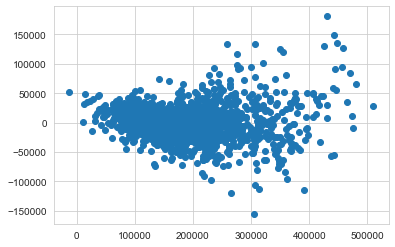

In [29]:
plt.scatter(y_pred, resids)

In [44]:
def write_score_to_file(X, y, filename, description):
    with open('scores.txt', 'a') as f:
        f.write('\n')
        f.write(str(time.ctime()) + ': ' + str(model.score(X, y)) + f' | Description: {description}')



In [210]:
write_score_to_file(X, y, 'scores.txt', "Added total basement sqft")

## Test 1: 'Exter Qual' and '1st flr sf'

In [ ]:
# houses_test['Exter Qual'] = houses_test['Exter Qual'].map(quality_map)

# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

# X_test = houses_test[fl1_under_3000_sf][['Exter Qual', '1st Flr SF']]

# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]

# submission.to_csv('./submissions/test1.csv', index=False)

In [ ]:
# plt.scatter(X['Exter Qual'], y)
# plt.scatter(X['1st Flr SF'], y)

# Xnorm = X['Exter Qual']/norm(houses_train['Exter Qual'])

# Xnorm2 = X['1st Flr SF']/norm(X['1st Flr SF'])

# plt.scatter(Xnorm, y)
# plt.scatter(Xnorm2, y)

## Test 2: 'Exter Qual' 'Kitchen Qual' '1st flr sf'

In [ ]:
# map_quality_to_discrete(houses_test, quality_cols_to_map)

# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

# X_test = houses_test[fl1_under_3000_sf][['Exter Qual', '1st Flr SF', 'Kitchen Qual']]

# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]

# submission.to_csv('./submissions/test3.csv', index=False)

## Test 5: Dummy vars + 1st and 2nd floor SF + Bath/Beds dummy + Streets + Lot Area

In [ ]:
# category_to_bool_cols(houses_test, ordinal_categories)

In [ ]:
# features = ['Exter Qual_Gd', 'Exter Qual_Fa', 'Exter Qual_TA',
#             'Kitchen Qual_Gd', 'Kitchen Qual_Fa', 'Kitchen Qual_TA',
#             'Bsmt Cond_Gd', 'Bsmt Cond_TA',
#             'Heating_GasW', 'Heating_Grav',
#             '1st Flr SF', '2nd Flr SF', 'Lot Area',
#             'Street_Pave', 'Paved_Drive',
#            'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4',
#             'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
#             'Bedroom AbvGr_4', 'Bedroom AbvGr_5',
#             'Bedroom AbvGr_6']


In [ ]:
# houses_test['has_2f'] = np.where(houses_test['2nd Flr SF'] > 0, 1, 0)
# houses_test['Paved_Drive'] = np.where(houses_test['Paved Drive'] == 'Y', 1, 0)

In [ ]:


# fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

In [ ]:
# X_test = houses_test[fl1_under_3000_sf][features]

In [ ]:
# houses_test['SalePrice'] = model.predict(X_test)

# submission = houses_test[['Id', 'SalePrice']]
# submission[submission['SalePrice'] < 0]
# submission.describe()

In [ ]:
# submission.to_csv('./submissions/test5.csv', index=False)

## Test 6: Adding Neighborhoods and overall quality/cond and Basement

In [30]:
category_to_bool_cols(houses_test, ordinal_categories)

In [31]:
features = ['Exter Qual_Gd', 'Exter Qual_Fa', 'Exter Qual_TA',
            'Kitchen Qual_Gd', 'Kitchen Qual_Fa', 'Kitchen Qual_TA',
            'Bsmt Cond_Gd', 'Bsmt Cond_TA',
            'Heating_GasW', 'Heating_Grav',
            '1st Flr SF', '2nd Flr SF',
            'Lot Area', 'Paved_Drive',
            'Full Bath_1', 'Full Bath_2', 'Full Bath_3', 'Full Bath_4',
            'Bedroom AbvGr_1', 'Bedroom AbvGr_2', 'Bedroom AbvGr_3',
            'Bedroom AbvGr_4', 'Bedroom AbvGr_5',
            'Bedroom AbvGr_6',
            'Overall Cond', 'Overall Qual',
           'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR',
        'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker',
           'has_central_air', 'Total Bsmt SF']



In [32]:
houses_test['has_2f'] = np.where(houses_test['2nd Flr SF'] > 0, 1, 0)
houses_test['Paved_Drive'] = np.where(houses_test['Paved Drive'] == 'Y', 1, 0)
houses_test['has_central_air'] = np.where(houses_test['Central Air'] == 'Y', 1, 0)
houses_test['Total Bsmt SF'].fillna(0, inplace=True)

In [33]:


fl1_under_3000_sf = houses_test['1st Flr SF'] < 3000

In [34]:
X_test = houses_test[fl1_under_3000_sf][features]

In [35]:
houses_test['SalePrice'] = model.predict(X_test)

submission = houses_test[['Id', 'SalePrice']]
submission[submission['SalePrice'] < 0]
submission.describe()

,Id,SalePrice
count,878.000000,878.000000
mean,1444.749431,179301.416750
std,850.838263,73759.314239
min,2.000000,14477.181326
25%,692.250000,129289.005501
50%,1433.000000,164346.117474
75%,2197.500000,214154.694199
max,2928.000000,594221.401215


In [36]:
submission.to_csv('./submissions/test6.csv', index=False)

## Past Experiments

In [ ]:
fl1_under_3000_sf = houses_train['1st Flr SF'] < 3000

In [ ]:
houses_train['Exter Qual'] = houses_train['Exter Qual'].map(quality_map)

In [ ]:
X = houses_train[fl1_under_3000_sf][['Exter Qual', '1st Flr SF']]
y = houses_train[fl1_under_3000_sf]['SalePrice']